# Theory of vibrations
© 2022 Exneyder A. Montoya-Araque, Daniel F. Ruiz and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/soil_dynamics/blob/main/notebooks/vibrations_theory.ipynb).

<iframe src="https://cmapscloud.ihmc.us/viewer/cmap/1XW2SS9HJ-13VT9CB-8R?title=false&toolbar=false&footer=false" width="600" height="300" frameborder="0" ></iframe>

## Required modules and global setup for plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import widgets as wgt
from IPython import get_ipython
from IPython.display import display

if 'google.colab' in str(get_ipython()):
    from google.colab import output
    output.enable_custom_widget_manager()
    %pip install ipympl &> ~/pip-log.txt

%matplotlib widget

plt.style.use("default")
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)
html_setup = '<style> div.jupyter-wgt.widget-label {display: none;} </style>'

## Harmonic motion

It is the simplest form of vibratory motion. In this case, the displacement, $x$, can described mathematically by the following equation:

$$
x = A \sin (\omega t )
$$

Where
* $\omega$ is the angular frequency.
* $A$ is the amplitude.

The following script plots two harmonic functions. The interactive widgets can be used to modify the functions and their plots.

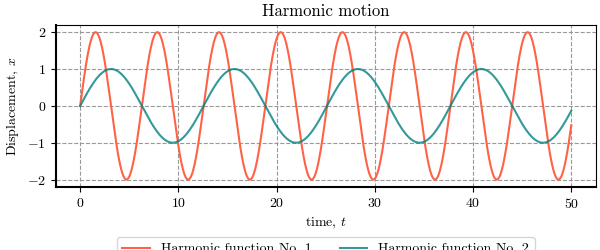

HTML(value='<style> div.jupyter-wgt.widget-label {display: none;} </style>')

In [2]:
def harmonic_motion(
    amplitude_1, amplitude_2, frequency_1, frequency_2, t_max=100, widget=False
):
    # Motion function
    t = np.linspace(0, t_max, int(t_max * 100))
    x_1 = amplitude_1 * np.sin(frequency_1 * t)
    x_2 = amplitude_2 * np.sin(frequency_2 * t)
    # Plot
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=[6, 2.5])
    ax.plot(t, x_1, color="tomato", label="Harmonic function No. 1")
    ax.plot(t, x_2, color="teal", label="Harmonic function No. 2", alpha=0.8)
    ax.set(xlabel="time, $t$", ylabel="Displacement, $x$")
    ax.set_title("Harmonic motion")
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.grid(True, which="major", color="#999999", linestyle="--")
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
    display(fig) if widget else plt.show()
    display(wgt.HTML(html_setup))
    plt.close()
    return

harmonic_motion(
    amplitude_1=2, amplitude_2=1, frequency_1=1, frequency_2=0.5, t_max=50
)

In [3]:
s, l = {'description_width': '50px'}, wgt.Layout(width='400px')
controls = {
    'amplitude_1': wgt.FloatSlider(value=2, min=0, max=10, step=0.5, description="A₁", style=s, layout=l),
    'amplitude_2': wgt.FloatSlider(value=1, min=0, max=10, step=0.5, description="A₂", style=s, layout=l),
    'frequency_1': wgt.FloatSlider(value=1, min=0.0001, max=5, step=0.05, description="𝜔₁", style=s, layout=l),
    'frequency_2': wgt.FloatSlider(value=0.5, min=0.0001, max=5, step=0.05, description="𝜔₂", style=s, layout=l),
    't_max': wgt.FloatSlider(value=50, min=0, max=300, step=0.5, description="t", style=s, layout=l),
    'widget': wgt.Checkbox(value=True, description='Non-vector image (improve widget performance)', style=s, layout=l)
}
fig = wgt.interactive_output(harmonic_motion, controls)
wgt.HBox((wgt.VBox(list(controls.values())), fig), layout=wgt.Layout(align_items='center'))

## 1 DoF system - Free vibration - Undamped

The solution for displacement, $x$, at a specific time, $t$, is given by the following equation:
\begin{equation}
x = C_1 \cos(\omega_\mathrm{n} t) + C_2 \sin(\omega_\mathrm{n} t)
\end{equation}
Where
* $\omega_\mathrm{n}$ is the natural angular frequency.
* $C_1$ and $C_2$ are constants obtained from the boundary condition at $t=0$.

The following script plots the displacement as the superposition of the two terms in the motion equation. The interactive widgets can be used to modify the function and its plot.

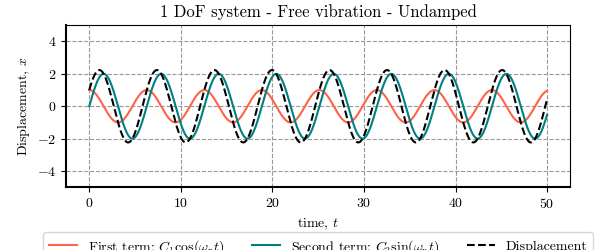

HTML(value='<style> div.jupyter-wgt.widget-label {display: none;} </style>')

In [4]:
def free_vibr_1dof_undamped(c1, c2, natural_freq, t_max=100, widget=False):
    # Motion function
    t = np.linspace(0, t_max, int(t_max*100))
    x = c1 * np.cos(natural_freq * t) + c2 * np.sin(natural_freq * t)
    x_1 = c1 * np.cos(natural_freq * t)
    x_2 = c2 * np.sin(natural_freq * t)
    # Plot
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=[6, 2.5])
    ax.plot(t, x_1, color='tomato', label="First term: $C_1 \cos(\omega_\mathrm{n} t)$")
    ax.plot(t, x_2, color='teal', label="Second term: $C_2 \sin(\omega_\mathrm{n} t)$")
    ax.plot(t, x, color='k', ls='--', label="Displacement")
    ax.set(xlabel="time, $t$", ylabel="Displacement, $x$", ylim=(-5, 5))
    ax.set_title("1 DoF system - Free vibration - Undamped")
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.grid(True, which="major", color="#999999", linestyle="--")
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=3)
    display(fig) if widget else plt.show()
    display(wgt.HTML(html_setup))
    plt.close()
    return

free_vibr_1dof_undamped(c1=1, c2=2, natural_freq=1, t_max=50)

In [5]:
s, l = {'description_width': '50px'}, wgt.Layout(width='400px')
controls = {
    'c1': wgt.FloatSlider(value=1, min=0, max=10, step=0.2, description="C₁", style=s, layout=l),
    'c2': wgt.FloatSlider(value=2, min=0, max=10, step=0.2, description="C₂", style=s, layout=l),
    'natural_freq': wgt.FloatSlider(value=1, min=0.0001, max=5, step=0.05, description="𝜔ₙ", style=s, layout=l),
    't_max': wgt.FloatSlider(value=50, min=0, max=300, step=0.5, description="t", style=s, layout=l),
    'widget': wgt.Checkbox(value=True, description='Non-vector image (improve widget performance)', style=s, layout=l)
}
fig = wgt.interactive_output(free_vibr_1dof_undamped, controls)
wgt.HBox((wgt.VBox(list(controls.values())), fig), layout=wgt.Layout(align_items='center'))

## 1 DoF system - Free vibration - With viscous damping

The solution for displacement, $x$, at a specific time, $t$, is given by the following equation:
$$
x = e^{-\omega_\mathrm{n} \beta t} \left( C_1 \cos(\omega_\mathrm{d} t) + C_2 \sin(\omega_\mathrm{d} t) \right)
$$
Where
* $\omega_\mathrm{n}$ is the natural angular frequency.
* $\omega_\mathrm{d}$ is the damped natural angular frequency, which is function of the damping ratio, $\beta$ and $\omega_\mathrm{n}$.  An underdamped system, is a system with vibration and exponential decay of $\beta < 1$, otherwise it is critically damped ($\beta = 1$) or overdamped ($\beta > 1$) and no vibration ebetasts.
$$
\omega_\mathrm{d} = \omega_\mathrm{n} \sqrt{1 - \beta^2}. 
$$
* $C_1$ and $C_2$ are constants obtained from the boundary condition at $t=0$. 

The following script plots the displacement. The interactive widgets can be used to modify the function and its plot.

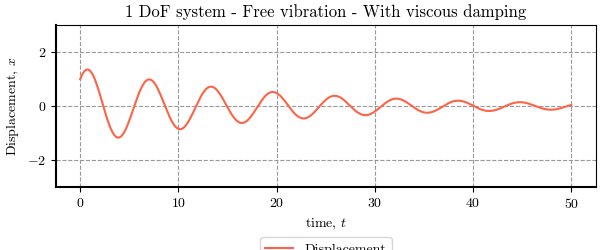

HTML(value='<style> div.jupyter-wgt.widget-label {display: none;} </style>')

In [6]:
def free_vibr_1dof_damped(c1, c2, natural_freq, damping_rat, t_max=100, widget=False):
    # Movement function
    t = np.linspace(0, t_max, int(t_max * 100))
    damped_freq = natural_freq * np.sqrt(1 - damping_rat**2)
    x = np.exp(-natural_freq * damping_rat * t) * (
        c1 * np.cos(damped_freq * t) + c2 * np.sin(damped_freq * t)
    )
    # Plot
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=[6, 2.5])
    ax.plot(t, x, color="tomato", label="Displacement")
    ax.set(xlabel="time, $t$", ylabel="Displacement, $x$", ylim=(-3, 3))
    ax.set_title("1 DoF system - Free vibration - With viscous damping")
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=1)
    ax.grid(True, which="major", color="#999999", linestyle="--")
    if widget:
        display(fig)
    else:
        plt.show()
        display(wgt.HTML(html_setup))
    plt.close()
    return

free_vibr_1dof_damped(c1=1, c2=1, natural_freq=1, damping_rat=0.05, t_max=50)

In [7]:
s, l = {'description_width': '50px'}, wgt.Layout(width='400px')
controls = {
    'c1': wgt.FloatSlider(value=1, min=0, max=10, step=0.2, description="C₁", style=s, layout=l),
    'c2': wgt.FloatSlider(value=2, min=0, max=10, step=0.2, description="C₂", style=s, layout=l),
    'natural_freq': wgt.FloatSlider(value=1, min=0.0001, max=5, step=0.05, description="𝜔ₙ", style=s, layout=l),
    'damping_rat': wgt.FloatSlider(value=0.05, min=0, max=1, step=0.02, description="𝛽", style=s, layout=l),
    't_max': wgt.FloatSlider(value=50, min=0, max=300, step=0.5, description="t", style=s, layout=l),
    'widget': wgt.Checkbox(value=True, description='Non-vector image (improve widget performance)', style=s, layout=l)
}
fig = wgt.interactive_output(free_vibr_1dof_damped, controls)
wgt.HBox((wgt.VBox(list(controls.values())), fig), layout=wgt.Layout(align_items='center'))

## 1 DoF system - Forced vibration - With viscous damping

Considering a viscous damped system (as the one in the previous section) subjected to a harmonic dynamic external excitation $f = F_0 \sin (\alpha t)$:

* The differential equation of motion is $m \ddot{x} + c \dot{x} + K x = F_0 \sin (\alpha t)$. It has a homogeneous or complementary solution, $x_\mathrm{h}$ (transient response), and a particular solution, $x_\mathrm{p}$ (steady state motion).
* The transient vibration will eventually die out because of the damping in the system.
* The steady state will persist as long as the excitation is acting. Such excitation acts with a frequency $\alpha$.

The displacement $x_\mathrm{h}$, at a specific time, $t$, is given by the following equation (same as for damped free vibration):
$$
x_\mathrm{h} = e^{-\omega_\mathrm{n} \beta t} \left( C_1 \cos(\omega_\mathrm{d} t) + C_2 \sin(\omega_\mathrm{d} t) \right)
$$

The displacement $x_\mathrm{p}$, at a specific time, $t$, is given by the following equation:

$$
x_\mathrm{p} = F_0 \sin(\alpha t + \theta)
$$

Where, $F_0$ is the peak amplitude of $x_\mathrm{p}$.
$$
F_0 = \frac{\frac{F_0}{K}}{\sqrt{ \left( 1 - r^2  \right)^2  +    \left( 2\beta r \right)^2   }}
$$

$\theta$ is the phase angle between the start of the damped vibration and the moment when $f$ is applied.

$$
\tan \theta = \frac{2\beta r}{1 - r^2}
$$

$r$ is the frequency ratio

$$
r = \frac{\alpha}{\omega_\mathrm{n}}
$$

Additionaly:
* $C_1$ and $C_2$ are constants obtained from the boundary condition at $t=0$.
* $\omega_\mathrm{n}$ is the natural angular frequency.
* $\omega_\mathrm{d}$ is the damped natural angular frequency. 
* $\psi$ is the phase angle
* $\beta$ is the damping ratio
* $K$, $C$ and $m$ are the spring's elastic modulus, the damper's constant and the mass, respectively.  



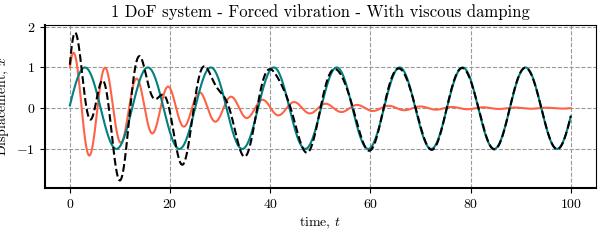

HTML(value='<style> div.jupyter-wgt.widget-label {display: none;} </style>')

In [8]:
def forced_vibr_1dof_damped(
    c1, c2, peak_amp, natural_freq, damping_rat, force_freq, t_max=100, widget=False
):
    # Movement function
    t = np.linspace(0, t_max, int(t_max * 100))
    damped_freq = natural_freq * np.sqrt(1 - damping_rat**2)
    x_h = np.exp(-natural_freq * damping_rat * t) * (
        c1 * np.cos(damped_freq * t) + c2 * np.sin(damped_freq * t)
    )
    freq_ratio = force_freq / natural_freq
    phase_ang = np.arctan(2 * damping_rat * freq_ratio / (1 - freq_ratio**2))
    x_p = peak_amp * np.sin(force_freq * t + phase_ang)

    # Plot
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=[6, 2.5])
    ax.plot(t, x_h, color="tomato", label="Homogeneous\nsolution")
    ax.plot(t, x_p, color="teal", label="Particular\nsolution")
    ax.plot(t, x_h + x_p, ls='--', color="k", label="Superposition")
    ax.set(xlabel="time, $t$", ylabel="Displacement, $x$")
    ax.set_title("1 DoF system - Forced vibration - With viscous damping")
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.grid(True, which="major", color="#999999", linestyle="--")
    ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.7), ncol=3)
    if widget:
        display(fig)
    else:
        plt.show()
        display(wgt.HTML(html_setup))
    plt.close()
    return

forced_vibr_1dof_damped(
    c1=1, c2=1, peak_amp=1, natural_freq=1, damping_rat=0.05, force_freq=0.5, t_max=100
)

In [9]:
s, l = {'description_width': '50px'}, wgt.Layout(width='400px')
controls = {
    'c1': wgt.FloatSlider(value=1, min=0, max=10, step=0.2, description="C₁", style=s, layout=l),
    'c2': wgt.FloatSlider(value=2, min=0, max=10, step=0.2, description="C₂", style=s, layout=l),
    'peak_amp': wgt.FloatSlider(value=1, min=0, max=10, step=0.5, description="F₀", style=s, layout=l),
    'natural_freq': wgt.FloatSlider(value=1, min=0.0001, max=5, step=0.05, description="𝜔ₙ", style=s, layout=l),
    'damping_rat': wgt.FloatSlider(value=0.05, min=0, max=1, step=0.02, description="𝛽", style=s, layout=l),
    'force_freq': wgt.FloatSlider(value=0.5, min=0.0001, max=5, step=0.05, description="α", style=s, layout=l),
    't_max': wgt.FloatSlider(value=50, min=0, max=300, step=0.5, description="t", style=s, layout=l),
    'widget': wgt.Checkbox(value=True, description='Non-vector image (improve widget performance)', style=s, layout=l)
}
fig = wgt.interactive_output(forced_vibr_1dof_damped, controls)
wgt.HBox((wgt.VBox(list(controls.values())), fig), layout=wgt.Layout(align_items='center'))